<a href="https://colab.research.google.com/github/H3IN-THANT/ShadowFox/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
  df = pd.read_csv('car.csv')
  print("Dataset loaded successfully.")
except FileNotFoundError:
  print("Error: File not found!")
  exit()

Dataset loaded successfully.


In [ ]:
print("\n------ Data Sample -----")
print(df.head())
print("\n --- Dataset Info ---")
df.info()
print("\n --- Dataset Description ---")
print(df.describe())

In [4]:
print("\n--- Missing Values Before Handling ---")
print(df.isnull().sum())


--- Missing Values Before Handling ---
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
cur_year = 2025
df['Years_since_Manufacture'] = cur_year - df['Year']
print("\n --- Data with New Feature 'Years_since_Manufacture' ---")
print(df.head())


 --- Data with New Feature 'Years_since_Manufacture' ---
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Years_since_Manufacture  
0      Dealer       Manual      0                       11  
1      Dealer       Manual      0                       12  
2      Dealer       Manual      0                        8  
3      Dealer       Manual      0                       14  
4      Dealer       Manual      0                       11  


In [6]:
categorical_cols = df.select_dtypes(include='object').columns
print("\n --- Categorical Columns ---")
print(list(categorical_cols))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n --- Data after One-Hot Encoding ---")
print(df.head())
print("\n --- Data Info after Preprocessing ---")
df.info()


 --- Categorical Columns ---
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

 --- Data after One-Hot Encoding ---
   Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0  2014           3.35           5.59       27000      0   
1  2013           4.75           9.54       43000      0   
2  2017           7.25           9.85        6900      0   
3  2011           2.85           4.15        5200      0   
4  2014           4.60           6.87       42450      0   

   Years_since_Manufacture  Car_Name_Activa 3g  Car_Name_Activa 4g  \
0                       11               False               False   
1                       12               False               False   
2                        8               False               False   
3                       14               False               False   
4                       11               False               False   

   Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  ...  Car_Name_swift  \
0              


 -- Descriptive Statistics ---
              Year  Selling_Price  Present_Price     Kms_Driven       Owner  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189   
std       2.891554       5.082812       8.644115   38886.883882    0.247915   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000   
max    2018.000000      35.000000      92.600000  500000.000000    3.000000   

       Years_since_Manufacture  
count               301.000000  
mean                 11.372093  
std                   2.891554  
min                   7.000000  
25%                   9.000000  
50%                  11.000000  
75%                  13.0

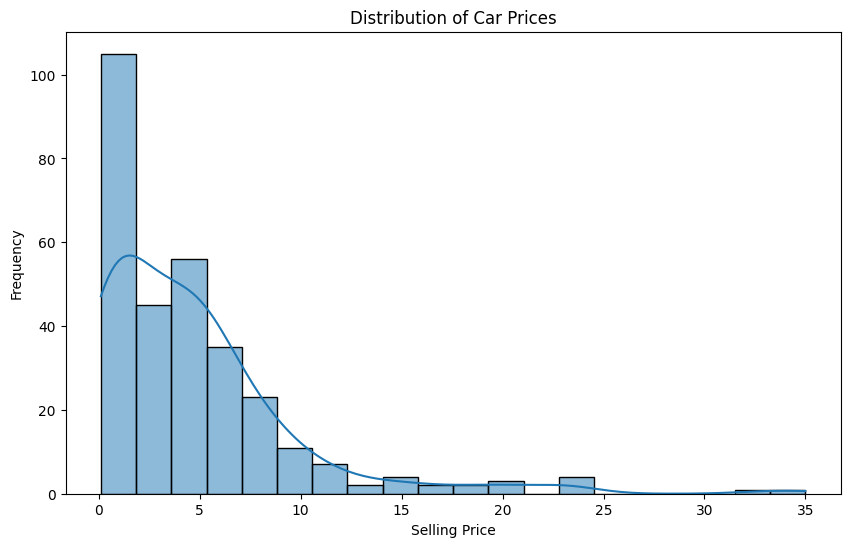

In [7]:
# --- Exploratory Data Analysis (EDA) ---
print("\n -- Descriptive Statistics ---")
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

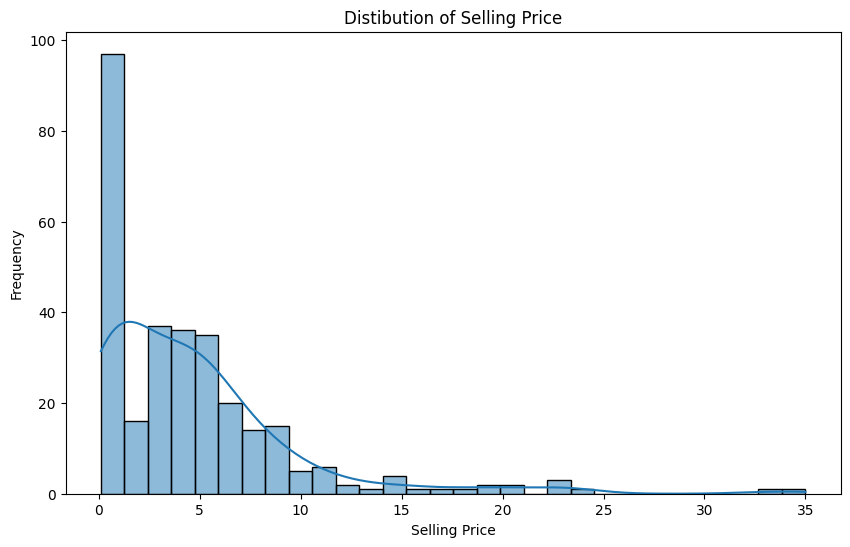

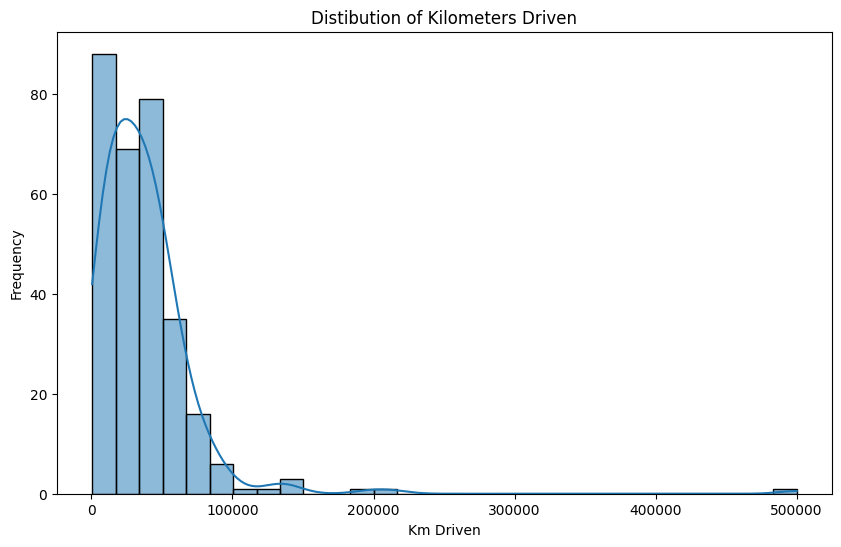

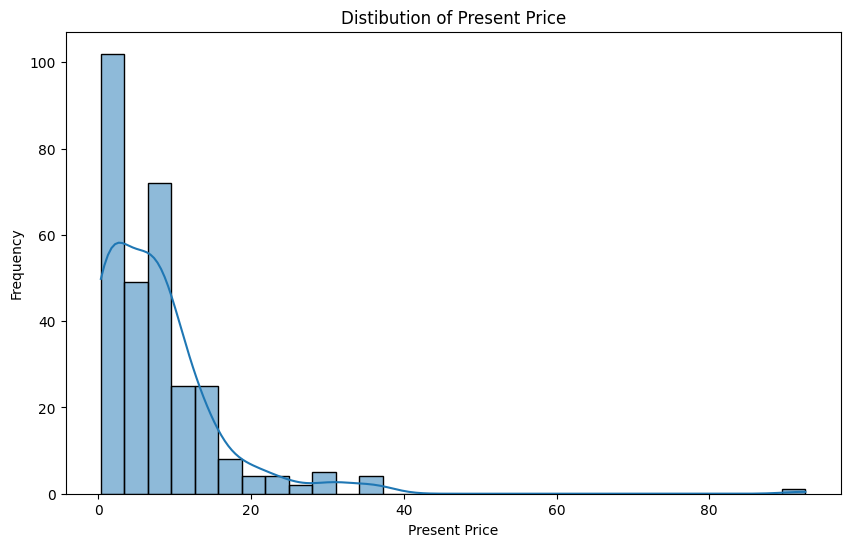

Text(0, 0.5, 'Frequency')

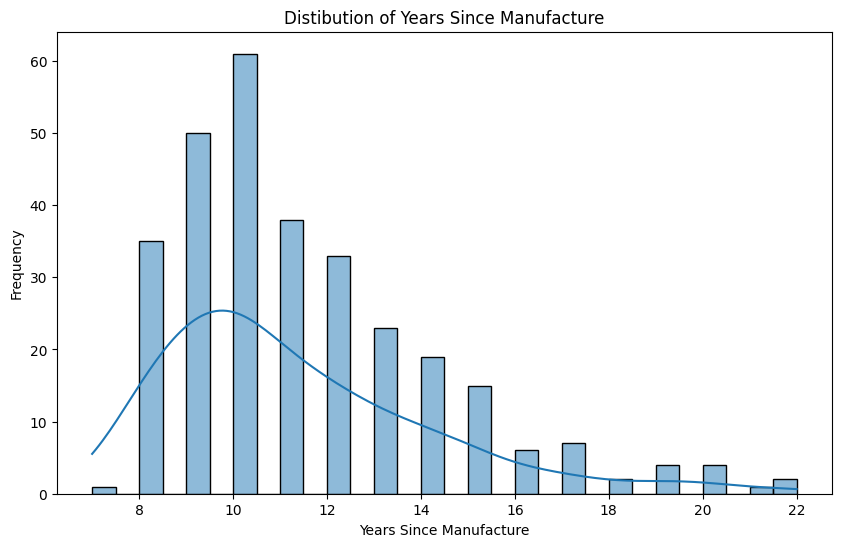

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], kde= True, bins = 30)
plt.title('Distibution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Kms_Driven'], kde= True, bins = 30)
plt.title('Distibution of Kilometers Driven')
plt.xlabel('Km Driven')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Present_Price'], kde= True, bins = 30)
plt.title('Distibution of Present Price')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Years_since_Manufacture'], kde= True, bins = 30)
plt.title('Distibution of Years Since Manufacture')
plt.xlabel('Years Since Manufacture')
plt.ylabel('Frequency')

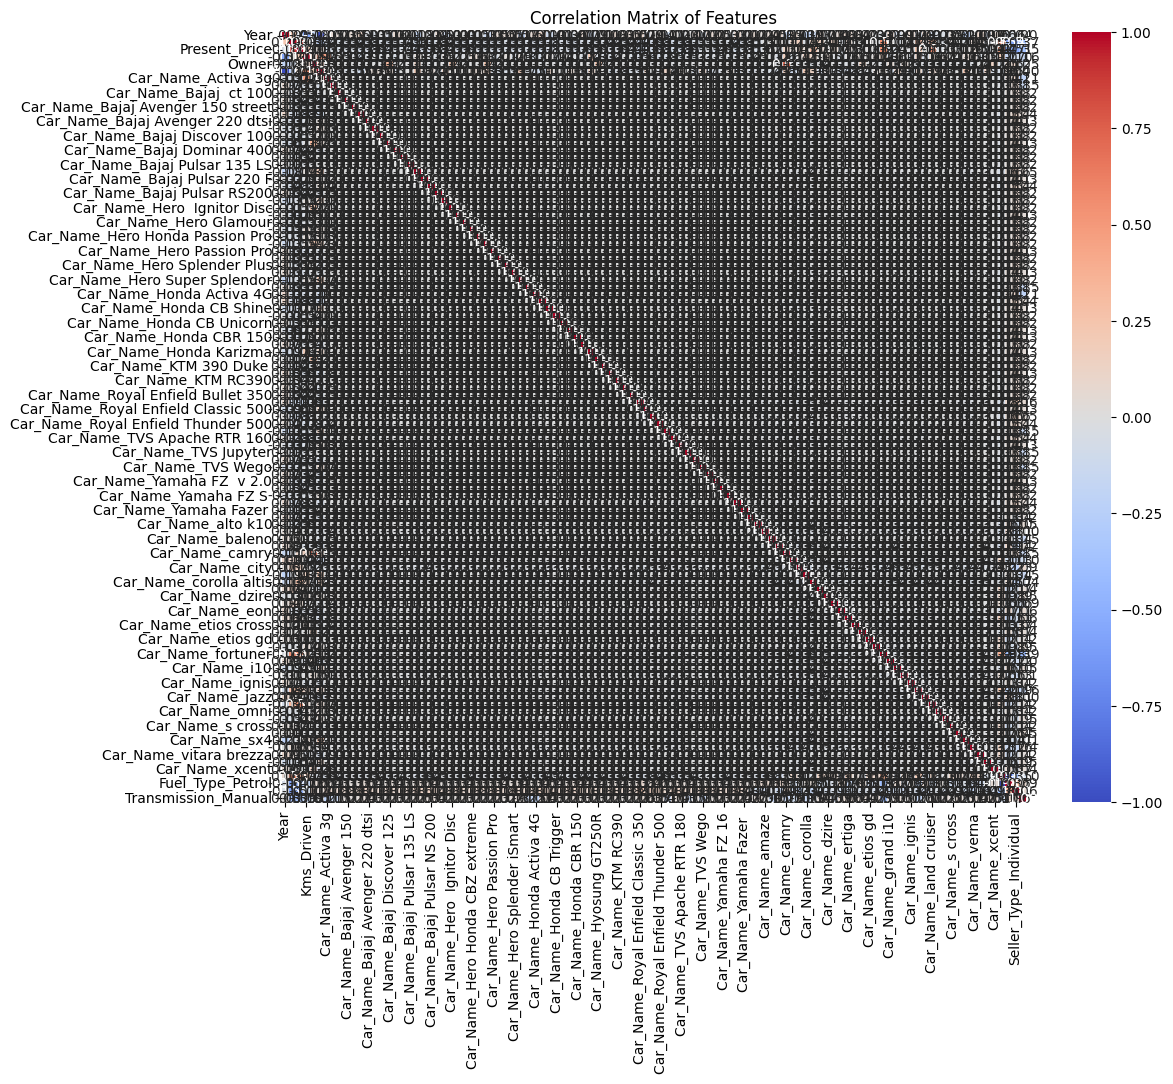

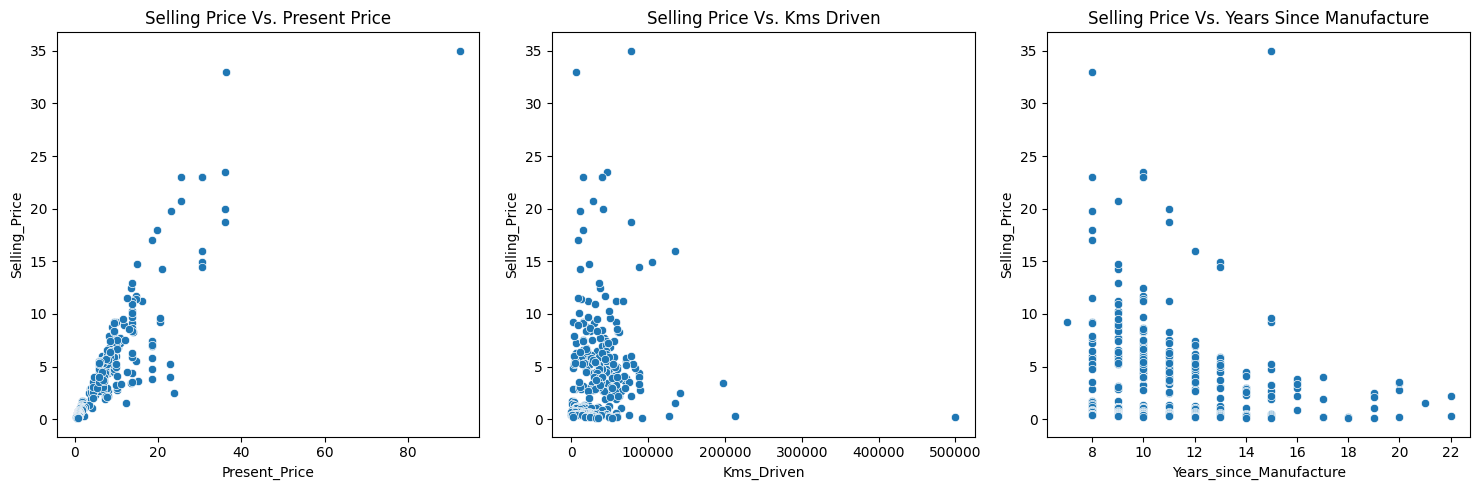

In [9]:
#Examine correlations bet features and Selling price

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Present_Price', y= 'Selling_Price', data = df)
plt.title('Selling Price Vs. Present Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Kms_Driven', y= 'Selling_Price', data = df)
plt.title('Selling Price Vs. Kms Driven')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Years_since_Manufacture', y= 'Selling_Price', data = df)
plt.title('Selling Price Vs. Years Since Manufacture')
plt.tight_layout()
plt.show()

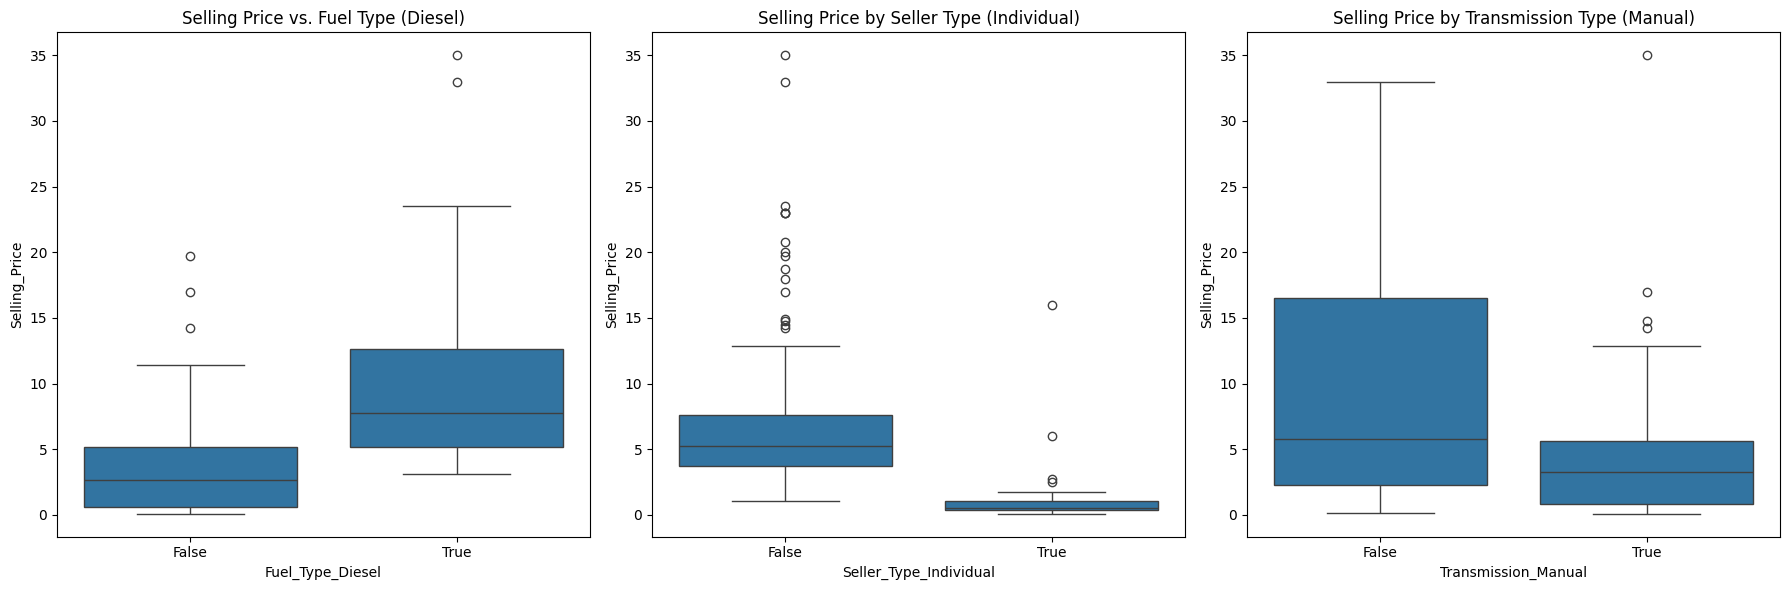

In [10]:
#Rs between categorical features & Selling_Price

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Fuel_Type_Diesel', y='Selling_Price', data=df)
plt.title('Selling Price vs. Fuel Type (Diesel)')

plt.subplot(1, 3, 2)
sns.boxplot(x='Seller_Type_Individual', y='Selling_Price', data=df)
plt.title('Selling Price by Seller Type (Individual)')

plt.subplot(1, 3, 3)
sns.boxplot(x='Transmission_Manual', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type (Manual)')
plt.tight_layout()
plt.show()

In [11]:
print("\n --- Final Preprocessed and Engineered Data Sample --- ")
print(df.head())
print("\n --- Final Preprocessed and Engineered Data Info --- ")
df.info()


 --- Final Preprocessed and Engineered Data Sample --- 
   Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0  2014           3.35           5.59       27000      0   
1  2013           4.75           9.54       43000      0   
2  2017           7.25           9.85        6900      0   
3  2011           2.85           4.15        5200      0   
4  2014           4.60           6.87       42450      0   

   Years_since_Manufacture  Car_Name_Activa 3g  Car_Name_Activa 4g  \
0                       11               False               False   
1                       12               False               False   
2                        8               False               False   
3                       14               False               False   
4                       11               False               False   

   Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  ...  Car_Name_swift  \
0                   False                       False  ...           False   
1    

In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [13]:
x = df.drop('Selling_Price', axis = 1)
y = df['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Training set size: {x_train.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')
print(f"Training target size: {y_train.shape[0]} samples")
print(f"Test target size: {y_test.shape[0]} samples")

print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Training set size: 240 samples
Test set size: 61 samples
Training target size: 240 samples
Test target size: 61 samples
X_train shape: (240, 106)
y_train shape: (240,)
X_test shape: (61, 106)
y_test shape: (61,)


In [14]:
# Model
rf_reg = RandomForestRegressor(random_state = 42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features' : ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_ran_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_dist, n_iter=100, cv=3, verbose = 2, random_state=42, n_jobs=-1)
rf_ran_search.fit(x_train, y_train)
best_params = rf_ran_search.best_params_
print(f'Best HyperParameters: {best_params}')

best_rf_model = rf_ran_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best HyperParameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error: 1.30
Root Mean Squared Error: 1.14


In [15]:
# Deployment

joblib.dump(best_rf_model, 'car_prediction_model.pkl')
print("Model saved as 'car_price_predictor_model.pkl'.")

Model saved as 'car_price_predictor_model.pkl'.
